# Setup

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import Image, display
from dowhy import CausalModel
import graphviz

%matplotlib inline

plt.style.use('fivethirtyeight')
sns.set_palette('Paired')
plt.rcParams['figure.figsize'] = (12,8)

In [62]:
df = pd.read_csv('../data/V2_BPD_CRIME_DATA_CLEAN.csv')
df.columns

Index(['Unnamed: 0', 'Description', 'Inside/Outside', 'Weapon', 'Post',
       'District', 'Neighborhood', 'Longitude', 'Latitude', 'Premise',
       'Season', 'Month', 'Hour', 'Year'],
      dtype='object')

# Cleaning

In [63]:
df.drop(columns='Unnamed: 0', inplace=True)

In [64]:
df['Inside/Outside'].value_counts()
df['Inside'] = np.where(df['Inside/Outside'] == 'INSIDE', False, True)

In [65]:
# Encoding
df['Description'] = df['Description'].astype('category').cat.codes

# Is Inside Treatment

In [66]:
# Main causal parameters
outcome_name = 'Description'
treatment_name = 'Inside'
# treatment_name = 'Functioning day bool'
common_causes_names = [ 'Weapon', 'Post', 'District', 'Neighborhood', 'Premise', 'Season', 'Month', 'Hour', 'Year']

In [67]:
# Create model
model = CausalModel(data=df,
                    treatment=treatment_name,
                    outcome=outcome_name,
                    common_causes=common_causes_names
                    )

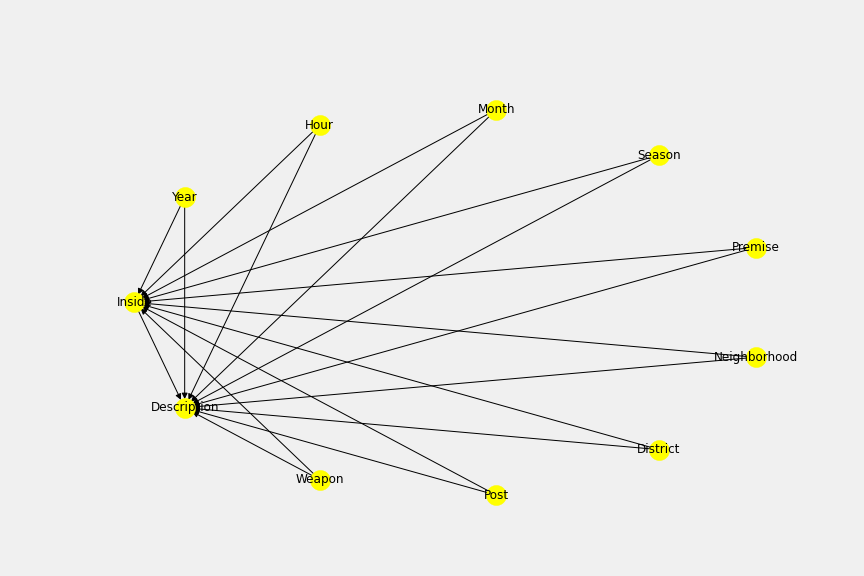

In [68]:
# View graph
# model.view_model()
display(Image(filename="causal_model.png"))

In [69]:
# Identify effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_stratification")
print(estimate)
print("Causal Estimate is " + str(estimate.value))

/home/bogt21/Desktop/git/Dazed-Confusion-Matrix/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/bogt21/Desktop/git/Dazed-Confusion-Matrix/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/bogt21/Desktop/git/Dazed-Confusion-Matrix/venv/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_stratificati

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
─────────(Expectation(Description|Post,Neighborhood,Month,District,Weapon,Hour
d[Inside]                                                                     

                      
,Premise,Season,Year))
                      
Estimand assumption 1, Unconfoundedness: If U→{Inside} and U→Description then P(Description|Inside,Post,Neighborhood,Month,District,Weapon,Hour,Premise,Season,Year,U) = P(Description|Inside,Post,Neighborhood,Month,District,Weapon,Hour,Premise,Season,Year)

## Realized estimand
b: Description~Inside+Post+Neighborhood+Month+District+Weapon+Hour+Premise+Season+Year
Target units: ate

## Estimate
Mean value: -2.0333289805613948

Causal Estimate is -2.0333289805613948


In [70]:
# Refute

# Common cause
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

/home/bogt21/Desktop/git/Dazed-Confusion-Matrix/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/bogt21/Desktop/git/Dazed-Confusion-Matrix/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/bogt21/Desktop/git/Dazed-Confusion-Matrix/venv/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_stratificati

Refute: Add a Random Common Cause
Estimated effect:-2.0333289805613948
New effect:-1.8191755831623388



In [71]:
# Bootstrap
# res_random=model.refute_estimate(identified_estimand, estimate, method_name="bootstrap_refuter")
# print(res_random)

In [72]:
# Subset
# res_random=model.refute_estimate(identified_estimand, estimate, method_name="data_subset_refuter")
# print(res_random)

In [73]:
# Placebo
# res_random=model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
# print(res_random)

/home/bogt21/Desktop/git/Dazed-Confusion-Matrix/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/bogt21/Desktop/git/Dazed-Confusion-Matrix/venv/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
/home/bogt21/Desktop/git/Dazed-Confusion-Matrix/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/bogt21/Desktop/git/Dazed-Confusion-Matrix/venv

KeyboardInterrupt: 